Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

I= inflow (m3/s),
Q= outflow(m3/s),
K= Storage time constant = 12 hour,
X= Weighing factor = 0.5,
Delta-T= 6 hour,
Time in Hour

Converting Dataset from txt to csv and Preparing dataset

In [2]:
df1=pd.read_csv("test_routing.txt",  dtype=int, skiprows=1, header=None)
df1=df1.T

df1["Time"]=np.empty
df1.loc[0,'Time'] = 0

for i in range(1,10):
  df1.loc[i,'Time'] = 6+df1. Time[i-1]
df1.to_csv ('Input_data.csv', header=["I","Time"])
df1.head(10)

,0,Time
0,10,0
1,20,6
2,50,12
3,60,18
4,55,24
5,45,30
6,35,36
7,27,42
8,20,48
9,15,54


Read Dataset

In [3]:
df= pd.read_csv('Input_data.csv',index_col=0)
df.head()

,I,Time
0,10,0
1,20,6
2,50,12
3,60,18
4,55,24


Visualizing Dataset

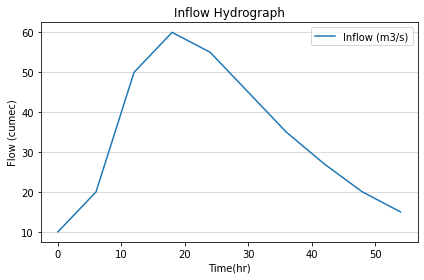

In [4]:
fig, ax = plt.subplots(1,1, squeeze= True)

ax.plot(df['Time'],df['I'],label='Inflow (m3/s)')
plt.title("Inflow Hydrograph")
plt.xlabel('Time(hr)')
plt.ylabel('Flow (cumec)')
plt.grid(visible = True, axis = 'y',  alpha = 0.6)
plt.legend()
plt.tight_layout()
plt.show()

Calculating C1,C2,C3:

In [5]:
K=12
X=0.5
delT=6
D = 2*K*(1-X)+ delT
# D
C1= (-(2*K*X)+ delT)/D
# C1
C2= ((2*K*X)+ delT)/D
# C2
C3= ((2*K*(1-X))- delT)/D
# C3

#check:
Z= C1+C2+C3
Z

1.0

Calculation Outflow,Q (m3/s): Outflow Equation: Qj+1 = C1IJ+1 + C2IJ + C3QJ

In [6]:
for index, row in df.iterrows():
     print(row['I'])

10
20
50
60
55
45
35
27
20
15


In [7]:
df["Q"]=np.empty
df.loc[0,'Q'] = 10

for i in range(1,10):
  df.loc[i,'Q'] = C1*df. I[i] + C2*df. I[i-1] + C3*df. Q[i-1]
df.head()

,I,Time,Q
0,10,0,10
1,20,6,6.666667
2,50,12,5.555556
3,60,18,31.851852
4,55,24,52.283951


In [8]:
df.to_csv("Muskingum_Outflow.csv")

Visualizing Inflow VS Outflow

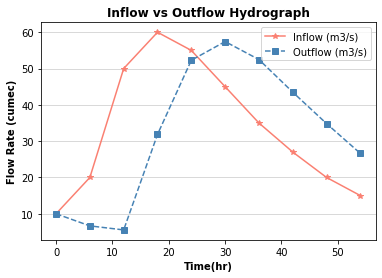

In [9]:
fig, ax = plt.subplots(1,1, squeeze= True)

ax.plot(df['Time'],df['I'],'-*',label='Inflow (m3/s)',color='salmon')
ax.plot(df['Time'],df['Q'],'--s',label='Outflow (m3/s)', color='steelblue')
plt.title("Inflow vs Outflow Hydrograph",fontweight = 'semibold')
plt.xlabel('Time(hr)',fontweight = 'semibold')
plt.ylabel('Flow Rate (cumec)',fontweight = 'semibold')
plt.grid(visible = True, axis = 'y',  alpha = 0.6)
plt.legend()
plt.savefig("Inflow vs Outflow Hydrograph.png", dpi=150, bbox_inches='tight')
plt.show()